# Dasari Mohan Krishna

# Task - 5

# Explore Business Analytics (Level - Beginner & Intermediate)

In [35]:
%autosave 10

Autosaving every 10 seconds


In [36]:
# Importing libraries in Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Loading the dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [38]:
df.shape

(9994, 13)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [40]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [41]:
# Checking for duplicates
df.duplicated().sum()

17

In [42]:
# Removing duplicates values
df.drop_duplicates(inplace=True)

In [43]:
df.shape

(9977, 13)

In [44]:
# To find null values in the dataset
df.isnull().mean()*100

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

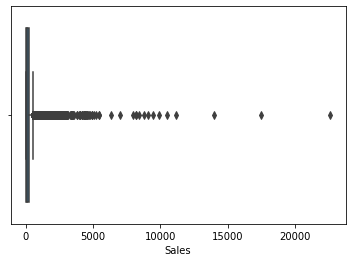

In [45]:
# Checking for the outliners
sns.boxplot(df['Sales'])

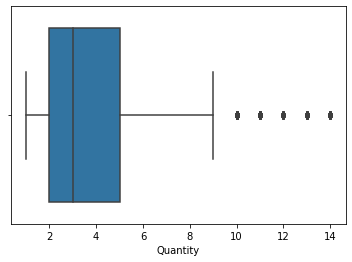

In [46]:
sns.boxplot(df['Quantity'])

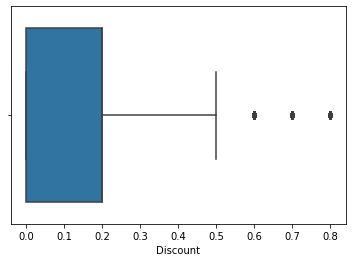

In [47]:
sns.boxplot(df['Discount'])

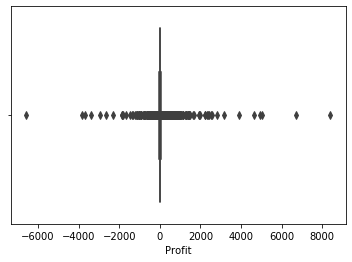

In [48]:
sns.boxplot(df['Profit'])

In [49]:
# Decreasing outliners
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

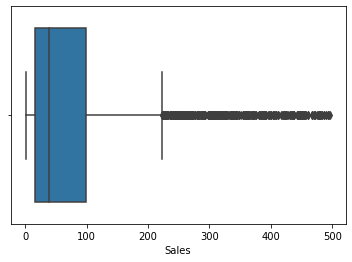

In [50]:
sns.boxplot(df['Sales'])

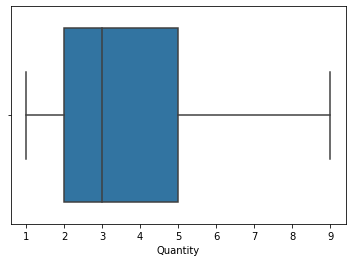

In [51]:
sns.boxplot(df['Quantity'])

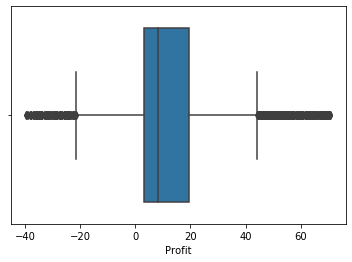

In [52]:
sns.boxplot(df['Profit'])

**Correlation**

In [53]:
c = df.corr()
c

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,0.059606,0.014144,0.069121,-0.005871
Sales,0.059606,1.000000,0.128263,0.137336,0.396678
Quantity,0.014144,0.128263,1.000000,-0.027241,0.229784
Discount,0.069121,0.137336,-0.027241,1.000000,-0.310595
Profit,-0.005871,0.396678,0.229784,-0.310595,1.000000


**Heatmap**

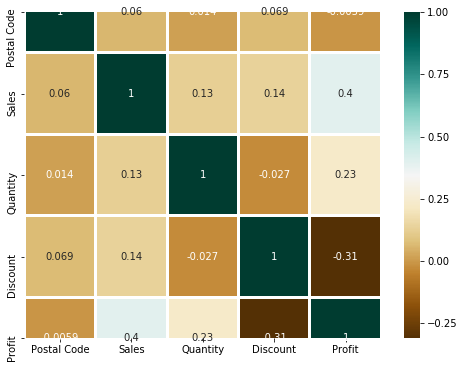

In [54]:
plt.subplots(figsize=(8,6))
sns.heatmap(c, cmap='BrBG', annot = True, lw=2)

# Data Visualization

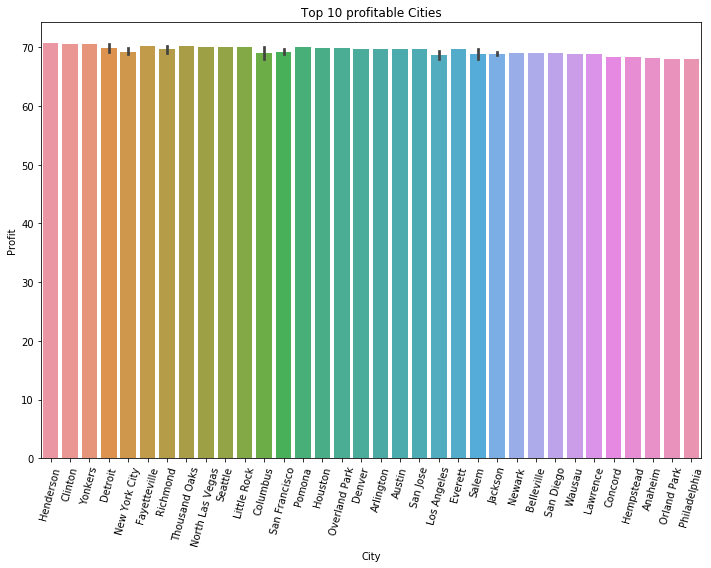

In [72]:
# Top 10 Profitable cities
sortedTop10 = df.sort_values(['Profit'], ascending=False).head(50)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

p = sns.barplot(x='City', y='Profit', data=sortedTop10, ax=ax)
ax.set_title("Top 10 profitable Cities")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

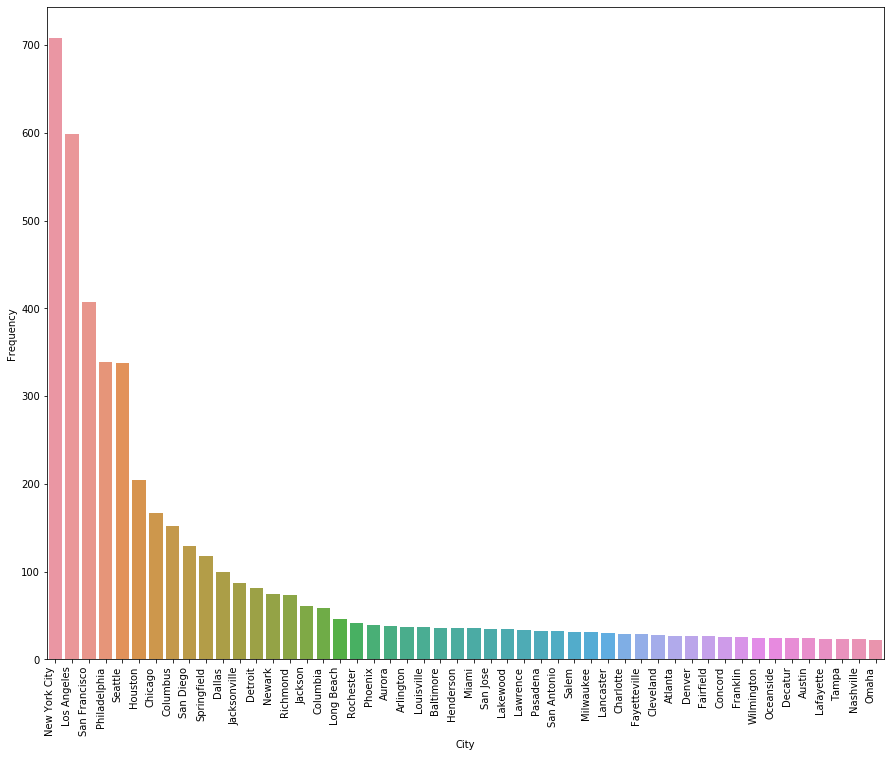

In [71]:
plt.figure(figsize=(15,12))
sns.countplot(x=df['City'],order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90,fontsize=10,ha='right')
plt.yticks(fontsize=10)
plt.xlabel('City')
plt.ylabel('Frequency')

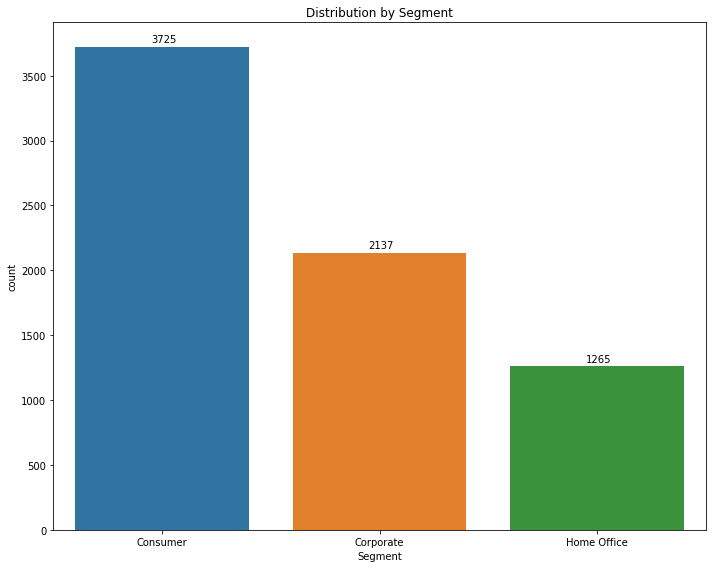

In [56]:
# Distribution of the segment
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
p = sns.countplot(x="Segment", data=df, ax=ax)
ax.set_title("Distribution by Segment")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+30))
plt.tight_layout()
plt.show()

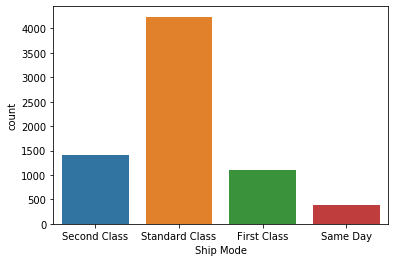

<Figure size 720x576 with 0 Axes>

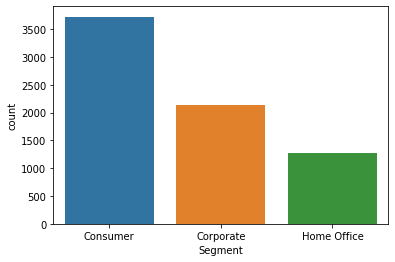

<Figure size 720x576 with 0 Axes>

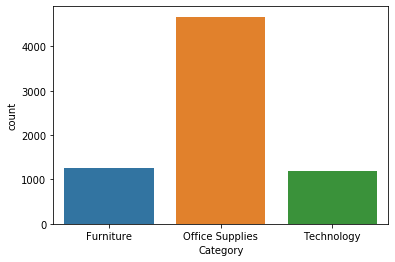

<Figure size 720x576 with 0 Axes>

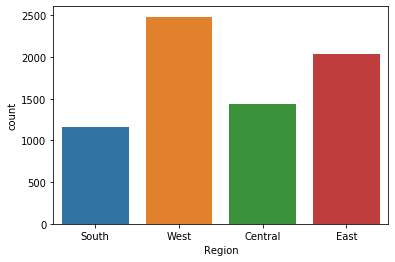

<Figure size 720x576 with 0 Axes>

In [57]:
for i in df[['Ship Mode','Segment','Category','Region']]:
    sns.countplot(df[i])
    plt.figure(figsize=(10,8))
    plt.show()

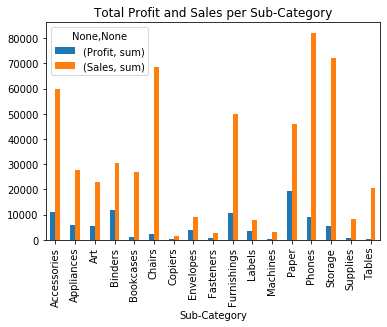

In [58]:
# Total Profit and Sales per Sub-Category
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

**From the above graph, the Phones have high sales and Paper got more profit**

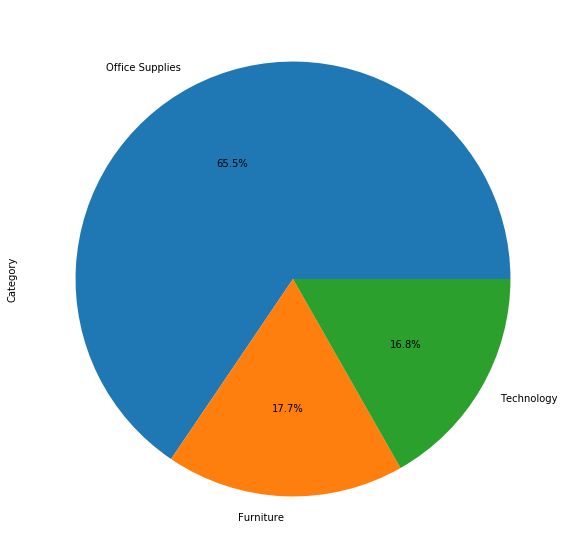

In [25]:
# Distribution of category
plt.figure(figsize=(12,10))
df['Category'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

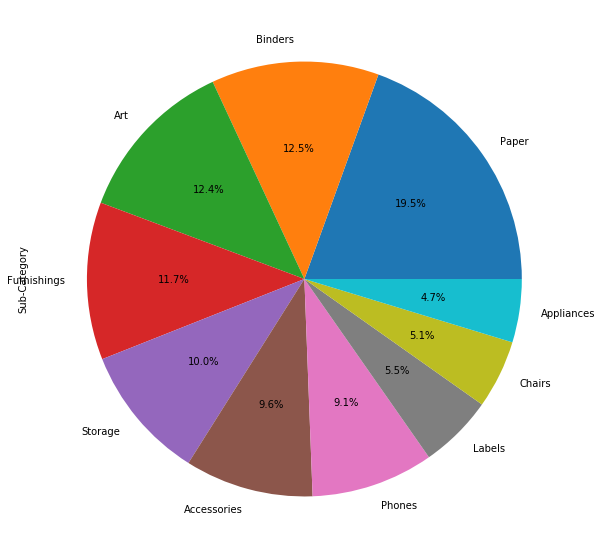

In [26]:
# Distribution of Sub-category
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

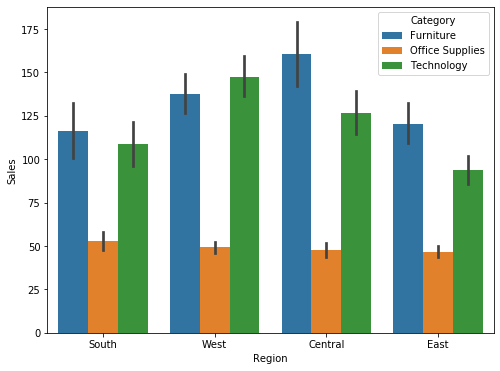

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='Region',y='Sales',hue='Category',data=df)

# Conclusion

**Considering above reports, we can conclude that cities like Henderson, Clinton, Yonkers have high profits and when it comes 
to products like Paper have high profits and phones have high sales. Office suppliers are more sold out than those of furniture
and technology products.In some cities, even though company providing hugediscount, there is no increase in Sales and Profits**